|index|filename             |Description|
|-----|:-------------------:|:----------:|
|0.	  |noTauDFCand.npz      |ncols = 3, type = {`bool`,`bool`,`string`}, contents = {no tau?, Different flavor?, EM or ME}|
|1.	  |reco_MET.npz         |ncols = 4, type = `double`, contents = {$p_T^\mathrm{miss}$, $p_x^\mathrm{miss}$, $p_y^\mathrm{miss}$, $\phi$} |
|2.	  |reco_leading_lep.npz |ncols = 8, type = `double`, contents = {$E$, $p_x$, $p_y$, $p_z$, $m$, $p_T$, $\eta$, $\phi$} | 
|3.	  |reco_sublead_lep.npz |*same as above, but for subleading reco lepton*|
|4.	  |truth_Higgs.npz      |ncols = 9, type = `double` + `int`, contents = {$E$, $p_x$, $p_y$, $p_z$, $m^2$, $p_T$, $\eta$, $\phi$, `pdgID`} |
|5.	  |truth_MET.npz        |*same as 1. but for truth MET* |
|6.	  |truth_leading_lep.npz|*truth particle contents*|
|7.	  |truth_leading_nu.npz |*truth particle contents*|
|8.	  |truth_leading_w.npz  |*truth particle contents*|
|9.	  |truth_sublead_lep.npz|*truth particle contents*|
|10.  |truth_sublead_nu.npz |*truth particle contents*|
|11.  |truth_sublead_w.npz  |*truth particle contents*|

## Take note that for the truth particle contents, the mass variable uses $m^2 = g_{\mu\nu}p^\mu p^\nu$, and the final column for `pdgId` only exists in truth and not in reco particle data

# Truth particle test: Lepton neutrino pair invariant mass versus W boson

In [7]:
truth_leading_w.describe()

,E,px,py,pz,m2,pt,eta,phi
count,1.640189e+06,1.640189e+06,1.640189e+06,1.640189e+06,1.640189e+06,1.640189e+06,1.640189e+06,1.640189e+06
mean,1.839852e+02,3.456460e-02,6.897583e-02,-5.140908e-02,5.334110e+03,4.035201e+01,-1.541129e-03,2.980512e-03
std,1.567366e+02,3.738289e+01,3.737348e+01,2.242511e+02,2.055380e+03,3.414642e+01,2.155222e+00,1.812555e+00
min,1.872600e+01,-7.925990e+02,-6.960300e+02,-3.221170e+03,4.004560e+00,5.986980e-02,-8.714400e+00,-3.141590e+00
25%,9.330680e+01,-1.838940e+01,-1.837080e+01,-9.283720e+01,5.281600e+03,1.979590e+01,-1.772160e+00,-1.565040e+00
50%,1.298210e+02,5.971690e-02,6.986790e-02,-1.631330e-02,6.334850e+03,3.139240e+01,-4.233120e-04,6.282300e-03
75%,2.151550e+02,1.849220e+01,1.851860e+01,9.262950e+01,6.517030e+03,4.923730e+01,1.769040e+00,1.570920e+00
max,3.241430e+03,7.937790e+02,8.429510e+02,3.239790e+03,1.241490e+04,8.593200e+02,9.582270e+00,3.141590e+00


In [34]:
truth_leading_lep_nu = ((truth_leading_lep['E' ]+truth_leading_nu['E' ])**2 -\
                        (truth_leading_lep['px']+truth_leading_nu['px'])**2 -\
                        (truth_leading_lep['py']+truth_leading_nu['py'])**2 -\
                        (truth_leading_lep['pz']+truth_leading_nu['pz'])**2)
truth_sublead_lep_nu = ((truth_sublead_lep['E' ]+truth_sublead_nu['E' ])**2 -\
                        (truth_sublead_lep['px']+truth_sublead_nu['px'])**2 -\
                        (truth_sublead_lep['py']+truth_sublead_nu['py'])**2 -\
                        (truth_sublead_lep['pz']+truth_sublead_nu['pz'])**2)

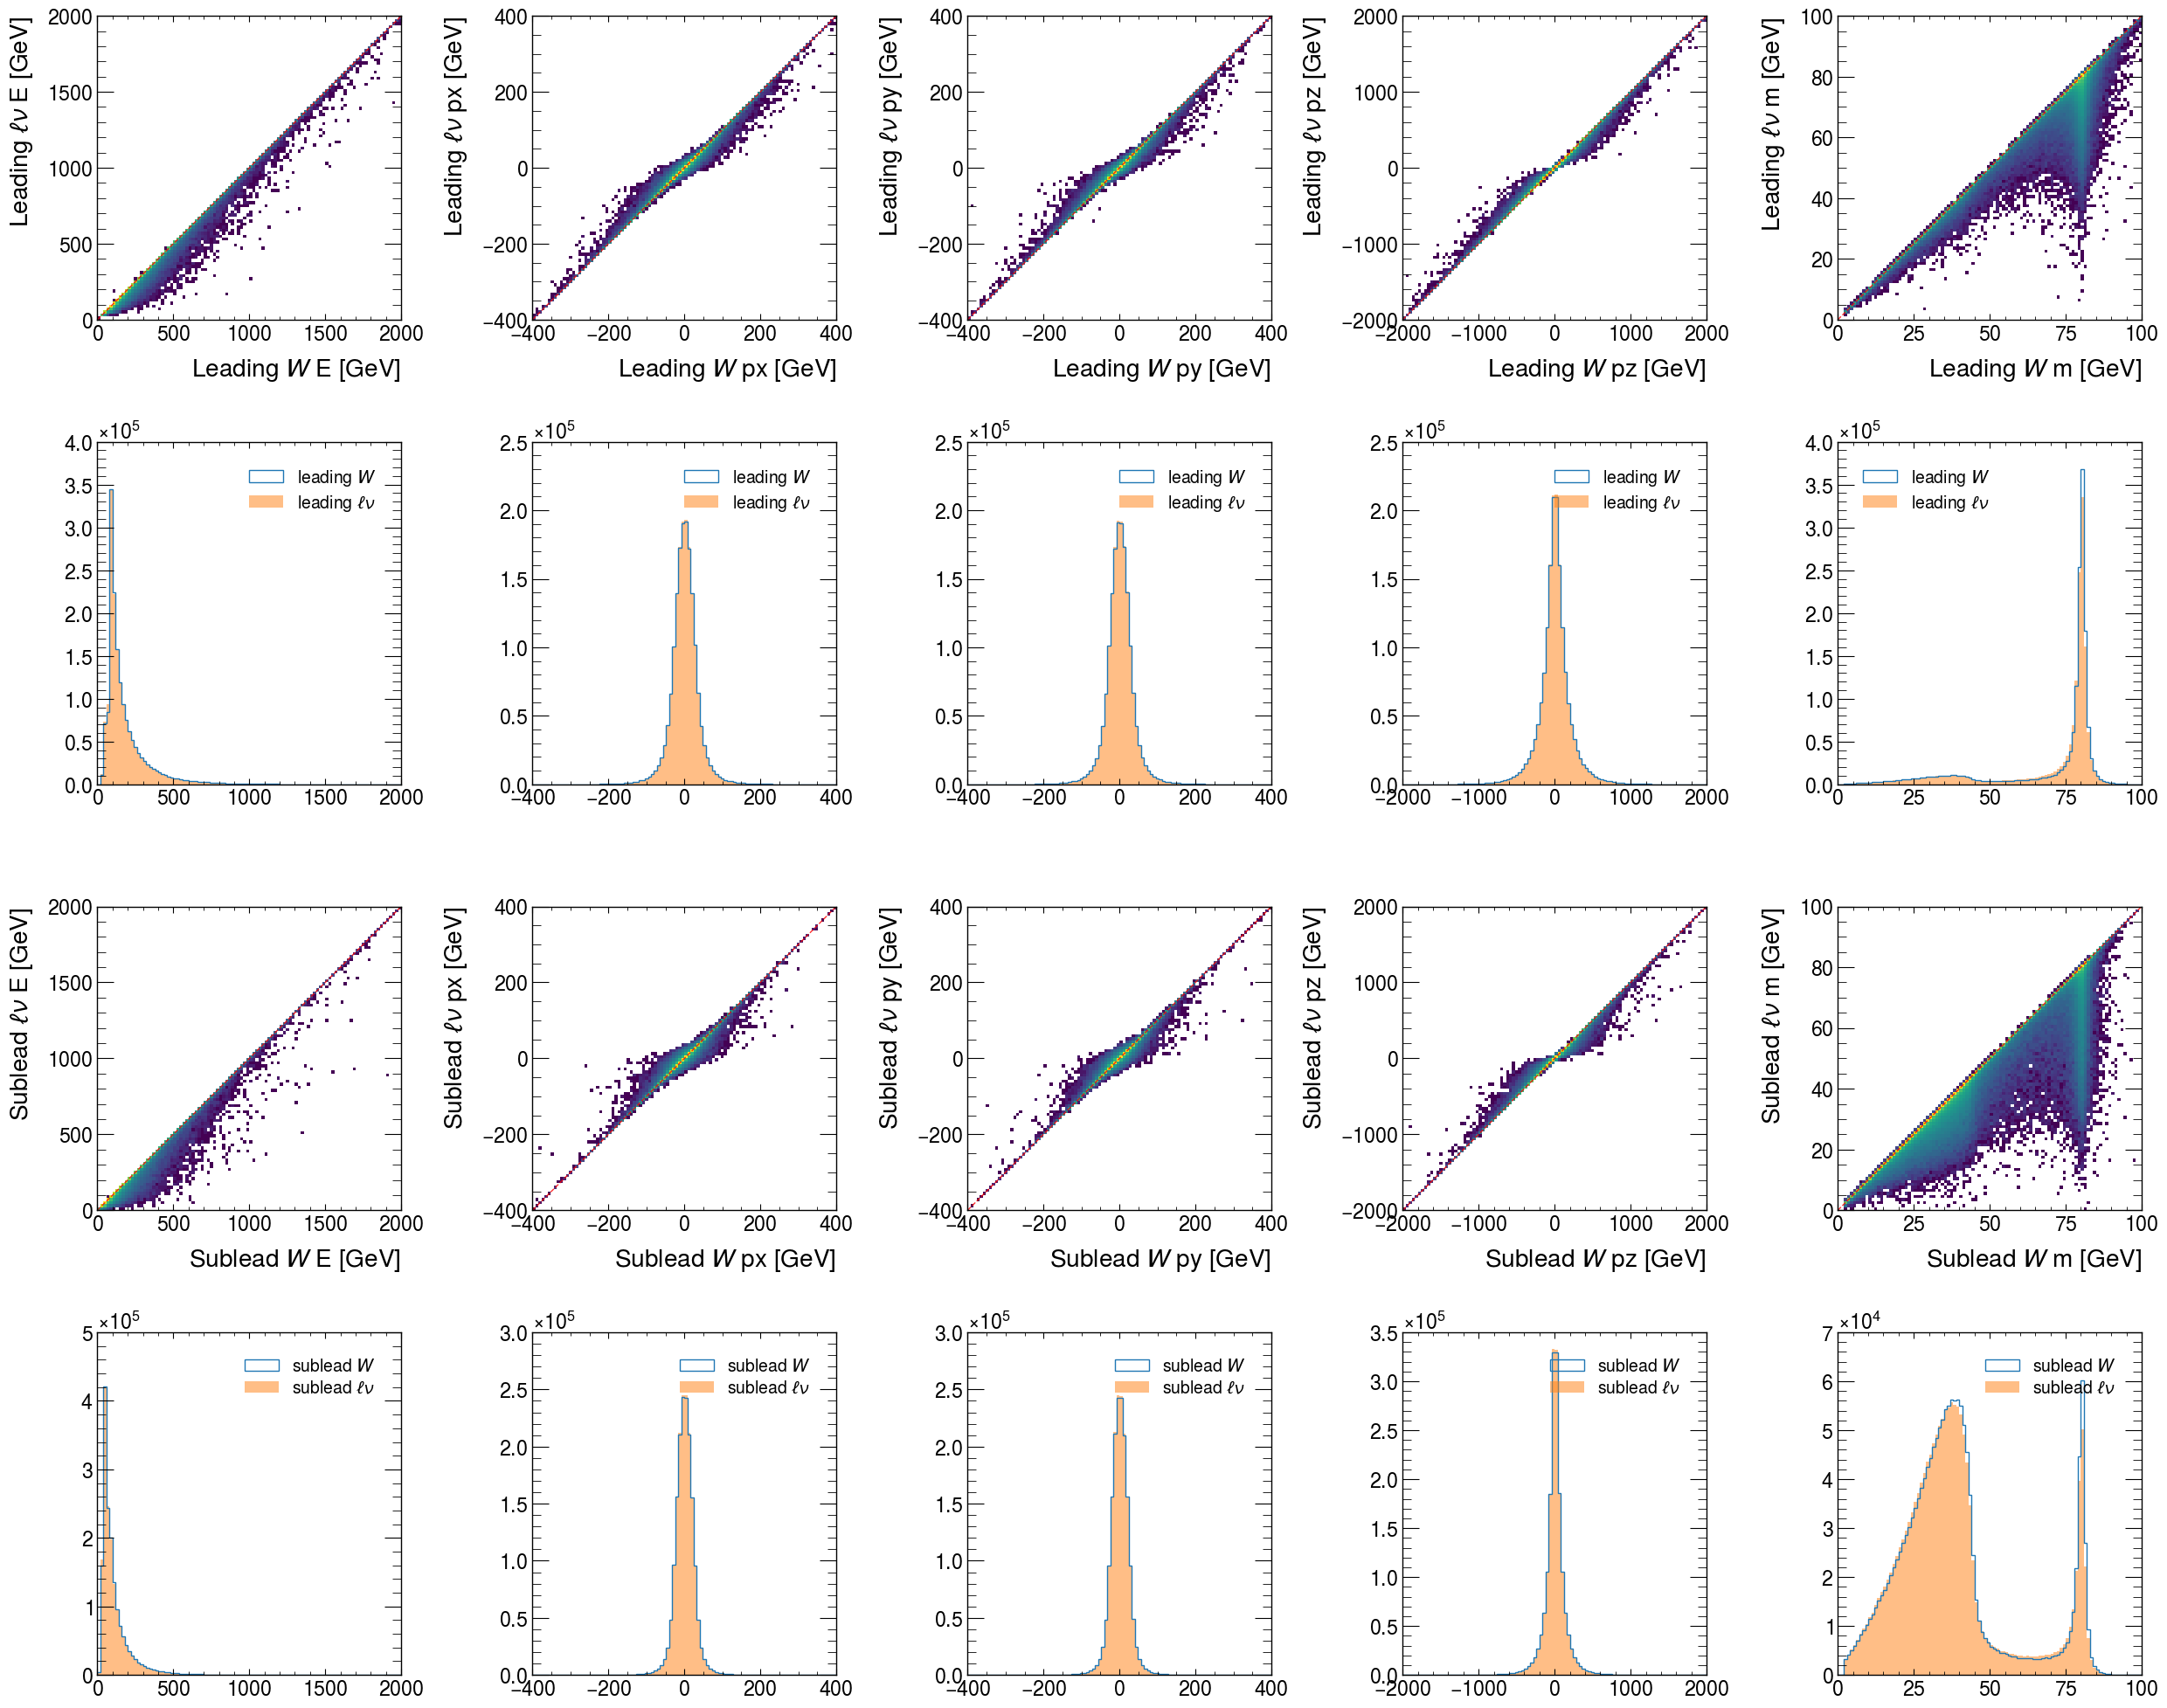

CPU times: user 10.7 s, sys: 466 ms, total: 11.1 s
Wall time: 10.6 s


In [30]:
%%time
fig, ax = plt.subplots(nrows=4,ncols=5,figsize=(25,20),tight_layout=True)#,sharey='row')
xranges=[[0,2000],[-400,400],[-400,400],[-2000,2000],[0,100]]
nbins = 100
for i,j in enumerate(['E','px','py','pz','m']):
    if i == 4:
        ax[0,i].hist2d(np.sqrt(truth_leading_w['m2'][timelikes]),np.sqrt(truth_leading_lep_nu[ timelikes]),range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap='viridis',norm=mpl.colors.LogNorm())
        ax[2,i].hist2d(np.sqrt(truth_sublead_w['m2'][timelikes]),np.sqrt(truth_sublead_lep_nu[ timelikes]),range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap='viridis',norm=mpl.colors.LogNorm())
        ax[1,i].hist(np.sqrt(truth_leading_w['m2'][timelikes]),range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'leading $W$'      )
        ax[1,i].hist(np.sqrt(truth_leading_lep_nu[ timelikes]),range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'leading $\ell\nu$')
        ax[3,i].hist(np.sqrt(truth_sublead_w['m2'][timelikes]),range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'sublead $W$')
        ax[3,i].hist(np.sqrt(truth_sublead_lep_nu[ timelikes]),range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'sublead $\ell\nu$')
    else:
        ax[0,i].hist2d(truth_leading_w[j],(truth_leading_lep[j]+truth_leading_nu[j]),range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap='viridis',norm=mpl.colors.LogNorm())
        ax[2,i].hist2d(truth_sublead_w[j],(truth_sublead_lep[j]+truth_sublead_nu[j]),range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap='viridis',norm=mpl.colors.LogNorm())
        ax[1,i].hist(truth_leading_w[j]                        ,range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'leading $W$'      )
        ax[1,i].hist((truth_leading_lep[j]+truth_leading_nu[j]),range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'leading $\ell\nu$')
        ax[3,i].hist(truth_sublead_w[j]                        ,range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'sublead $W$')
        ax[3,i].hist((truth_sublead_lep[j]+truth_sublead_nu[j]),range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'sublead $\ell\nu$')
    ax[0,i].axline((-1,-1),(1,1),lw=1,ls='dashed',c='r',alpha=0.8)
    ax[2,i].axline((-1,-1),(1,1),lw=1,ls='dashed',c='r',alpha=0.8)
    ax[0,i].set(xlabel=r'Leading $W$ '+j+' [GeV]',ylabel=r'Leading $\ell\nu$ '+j+' [GeV]',aspect=(1))
    ax[2,i].set(xlabel=r'Sublead $W$ '+j+' [GeV]',ylabel=r'Sublead $\ell\nu$ '+j+' [GeV]',aspect=(1))
    ax[1,i].legend()
    ax[3,i].legend()
plt.show()

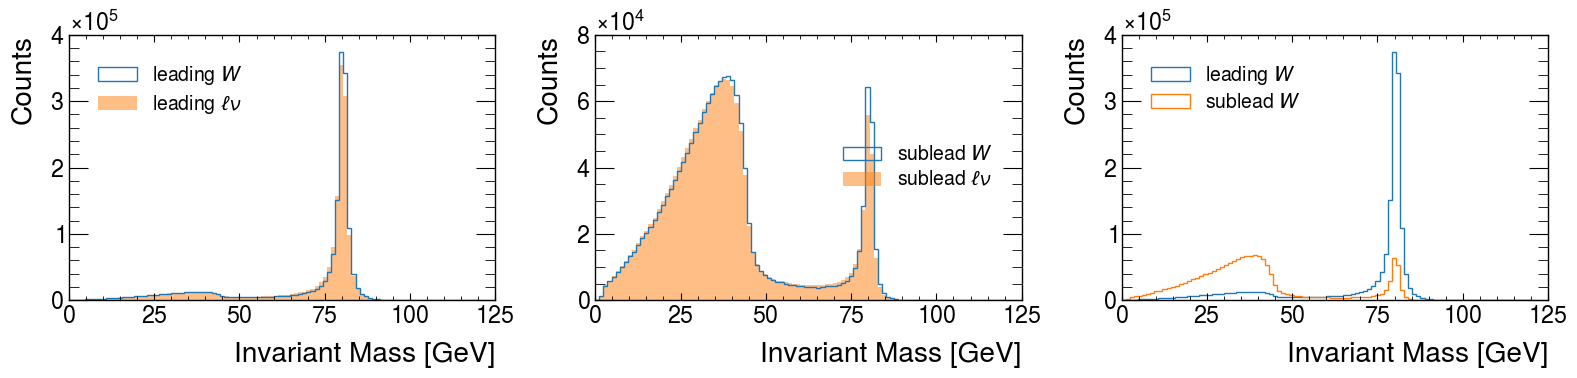

CPU times: user 1.83 s, sys: 454 ms, total: 2.29 s
Wall time: 1.8 s


In [36]:
%%time
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16,4),tight_layout=True)#,sharey='row')
ax = ax.flatten()
nbins=100
xrange=[0,120]
ax[0].hist(np.sqrt(truth_leading_w['m2'][timelikes]),range=xrange,bins=nbins,histtype='step',lw=1,label=r'leading $W$'      )
ax[0].hist(np.sqrt(truth_leading_lep_nu[ timelikes]),range=xrange,bins=nbins,histtype='bar',alpha=0.5,label=r'leading $\ell\nu$')
ax[1].hist(np.sqrt(truth_sublead_w['m2'][timelikes]),range=xrange,bins=nbins,histtype='step',lw=1,label=r'sublead $W$'      )
ax[1].hist(np.sqrt(truth_sublead_lep_nu[ timelikes]),range=xrange,bins=nbins,histtype='bar',alpha=0.5,label=r'sublead $\ell\nu$')
ax[2].hist(np.sqrt(truth_leading_w['m2'][timelikes]),range=xrange,bins=nbins,histtype='step',lw=1,label=r'leading $W$'      )
ax[2].hist(np.sqrt(truth_sublead_w['m2'][timelikes]),range=xrange,bins=nbins,histtype='step',lw=1,label=r'sublead $W$')

for i in ax:
    i.legend()
    i.set(xlabel='Invariant Mass [GeV]', ylabel='Counts')
plt.show()

# Truth particle test: Neutrino pair vs MET

In [37]:
truth_MET = pd.DataFrame()
reco_MET = pd.DataFrame()

GeV = 0.001
for i,x in enumerate(['pt','px','py','phi']):
    if i == 3: GeV = 1
    reco_MET[x]  = np.load(filepath+files[1],allow_pickle=True)[x]*GeV
    truth_MET[x] = np.load(filepath+files[5],allow_pickle=True)[x]*GeV
truth_MET.describe()

,pt,px,py,phi
count,1.640189e+06,1.640189e+06,1.640189e+06,1.640189e+06
mean,4.749318e+01,-1.246334e-02,-1.335349e-01,-6.242203e-03
std,2.984788e+01,3.966709e+01,3.966111e+01,1.814280e+00
min,6.019110e-02,-1.028910e+03,-9.528570e+02,-3.141590e+00
25%,3.032420e+01,-2.572800e+01,-2.575310e+01,-1.578090e+00
50%,4.292590e+01,-2.527150e-02,-1.661430e-01,-1.044610e-02
75%,5.640850e+01,2.567130e+01,2.549520e+01,1.564960e+00
max,1.049630e+03,8.470100e+02,7.471510e+02,3.141590e+00


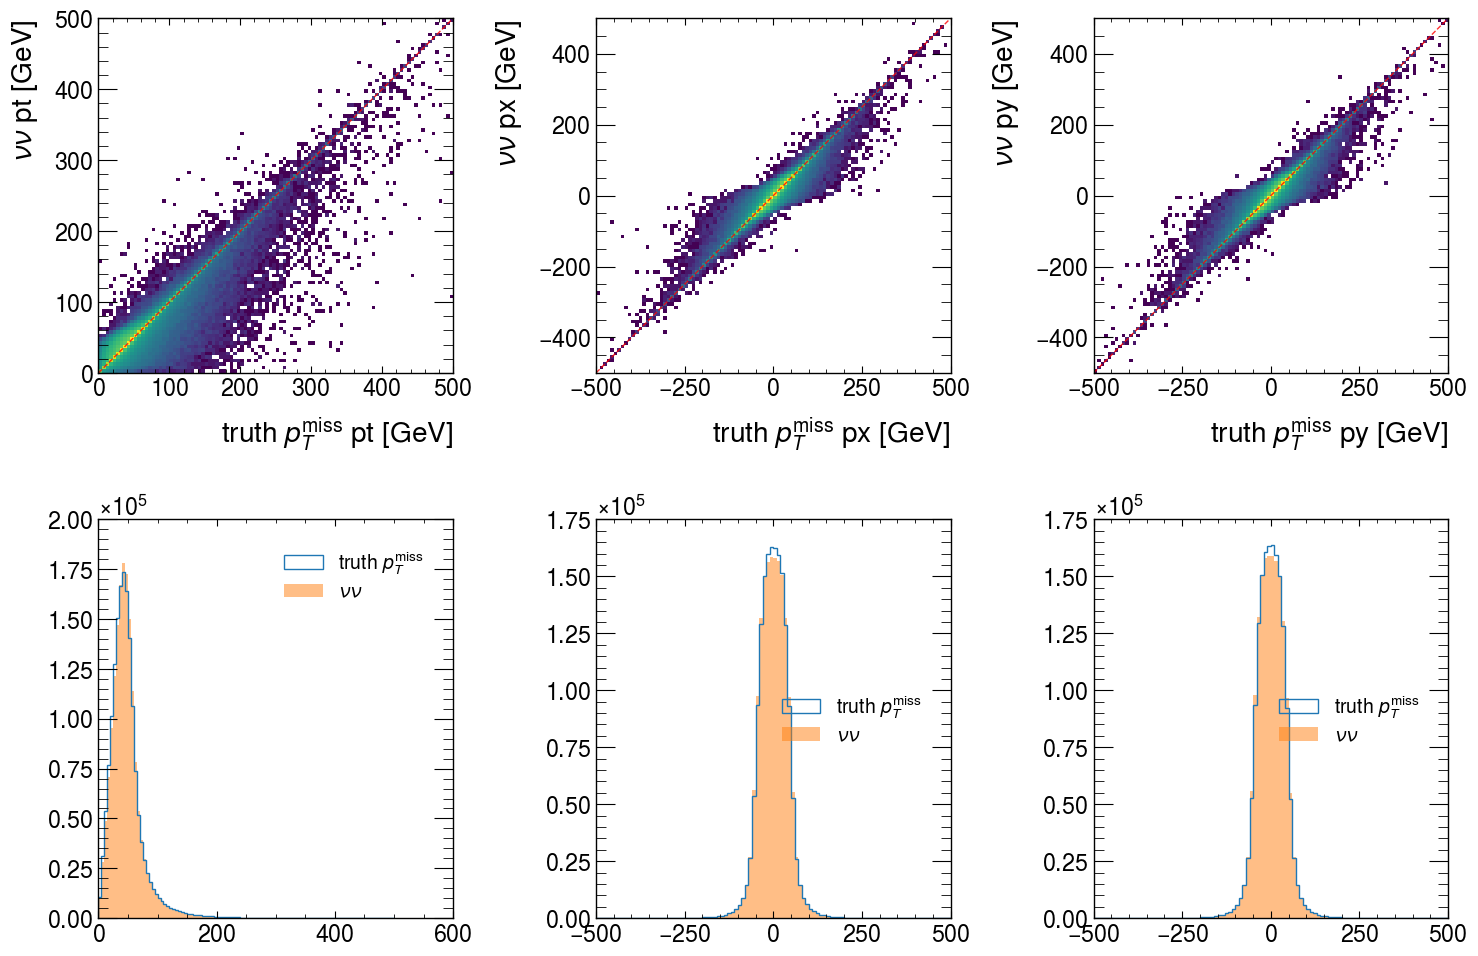

CPU times: user 3.48 s, sys: 442 ms, total: 3.92 s
Wall time: 3.37 s


In [40]:
%%time
diNuPt = np.sqrt((truth_leading_nu['px']+truth_sublead_nu['px'])**2+(truth_leading_nu['py']+truth_sublead_nu['py'])**2)
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(15,10),tight_layout=True)#,sharey='row')
#ax = ax.flatten()
xranges=[[0,500],[-500,500],[-500,500]]
for i,j in enumerate(['pt','px','py']):
    if i == 0:
        ax[0,i].hist2d(truth_MET[j], diNuPt,range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap=my_cmap,norm=mpl.colors.LogNorm())
        ax[1,i].hist(truth_MET[j],range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'truth $p_T^\mathrm{miss}$')
        ax[1,i].hist(diNuPt,range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'$\nu\nu$' )
    else:
        ax[0,i].hist2d(truth_MET[j],(truth_leading_nu[j]+truth_sublead_nu[j]),range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap=my_cmap,norm=mpl.colors.LogNorm())
        ax[1,i].hist( truth_MET[j]                        ,range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'truth $p_T^\mathrm{miss}$')
        ax[1,i].hist((truth_leading_nu[j]+truth_sublead_nu[j]),range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'$\nu\nu$' )
    ax[1,i].legend()
    ax[0,i].axline((-1,-1),(1,1),lw=1,ls='dashed',c='r',alpha=0.8)
    ax[0,i].set(xlabel=r'truth $p_T^\mathrm{miss}$ '+j+' [GeV]',ylabel=r'$\nu\nu$ '+j+' [GeV]',aspect=(1))

plt.show()

# Truth particle test: W boson pair invariant mass versus Higgs

In [14]:
truth_ww = ((truth_leading_w['E' ]+truth_sublead_w['E' ])**2 -\
            (truth_leading_w['px']+truth_sublead_w['px'])**2 -\
            (truth_leading_w['py']+truth_sublead_w['py'])**2 -\
            (truth_leading_w['pz']+truth_sublead_w['pz'])**2)
truth_ww_TL = np.where(truth_ww > 0, True, False)
print(np.unique(truth_ww_TL,return_counts=True))

(array([ True]), array([1640189]))


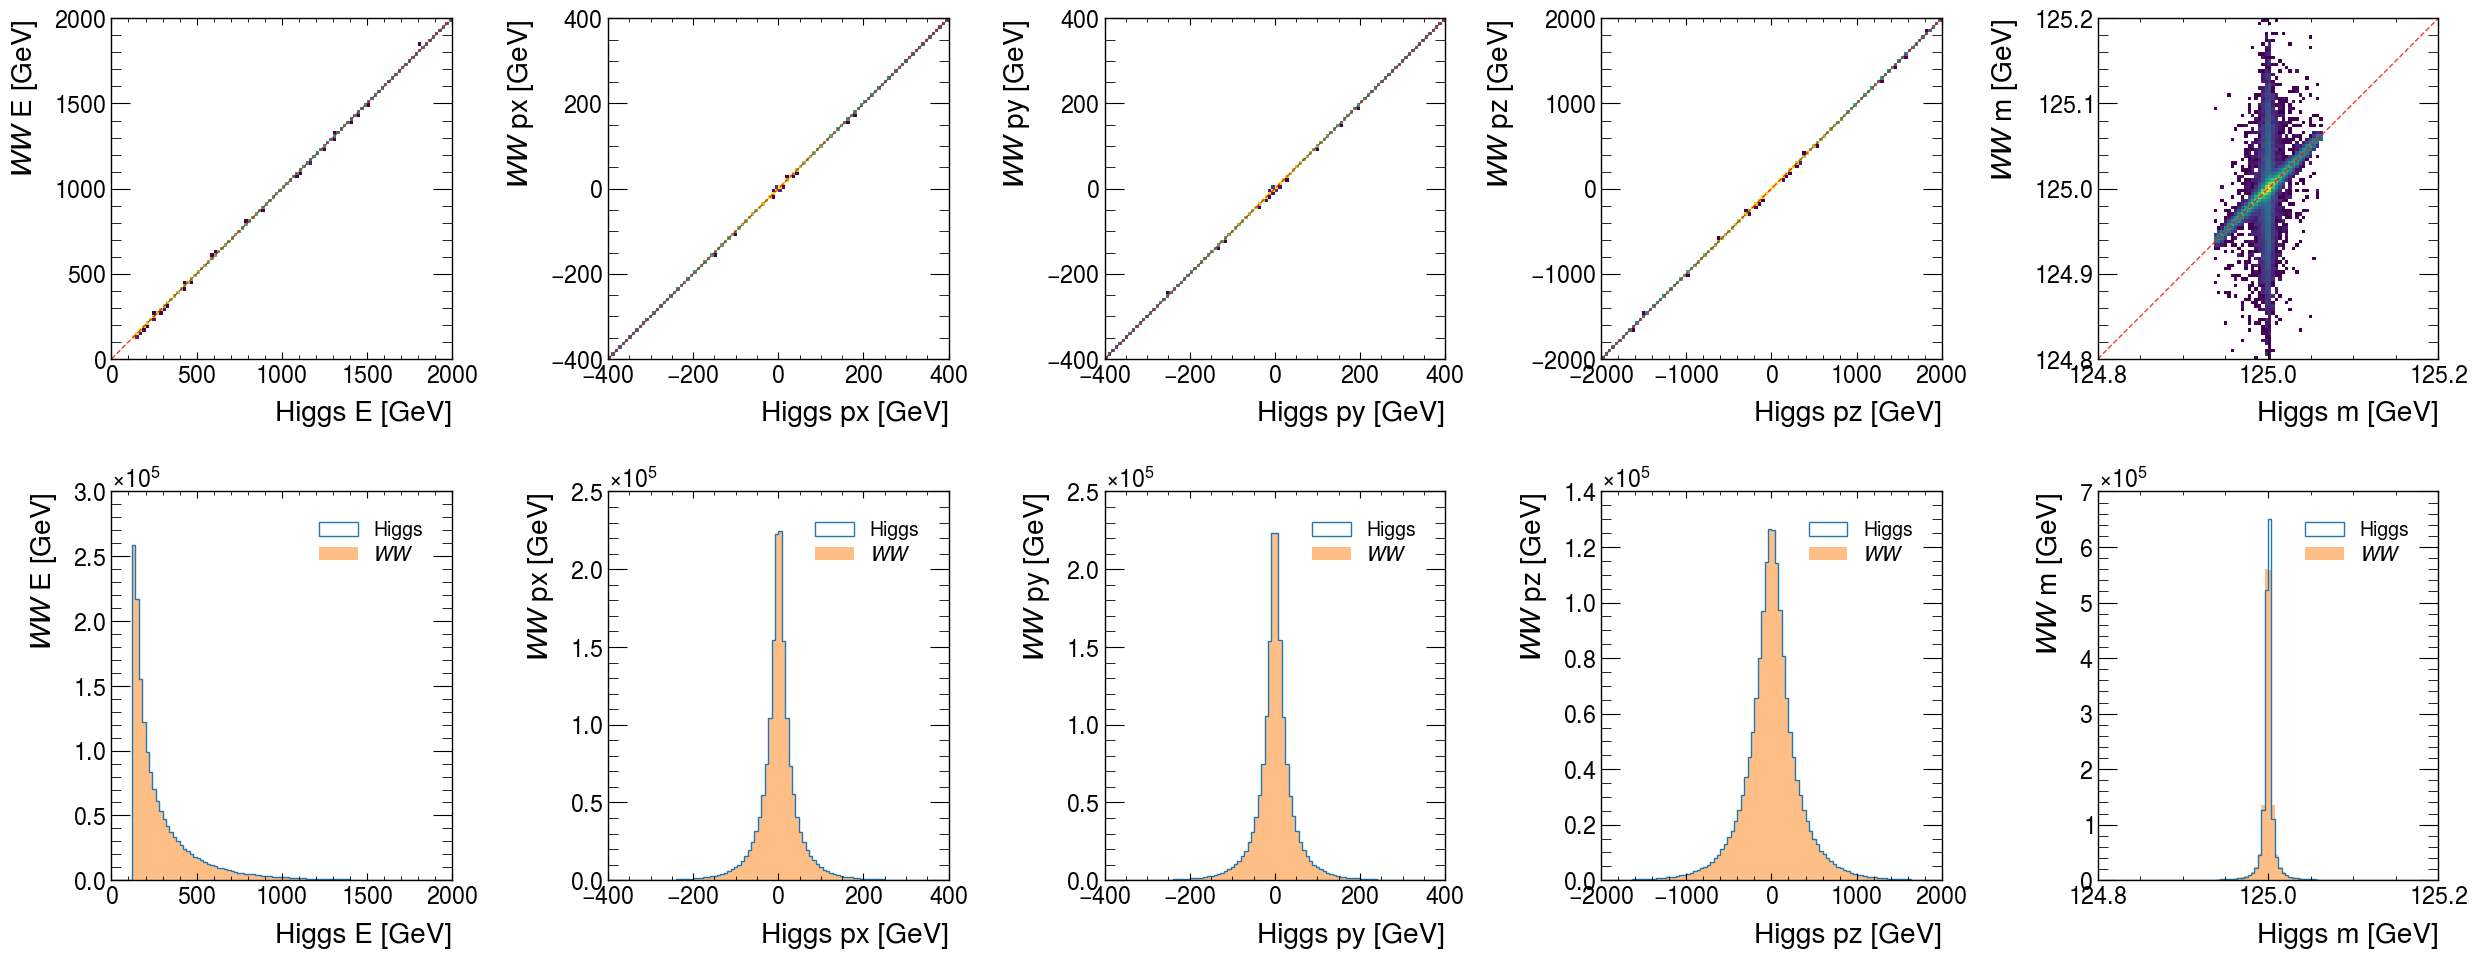

CPU times: user 5.3 s, sys: 442 ms, total: 5.74 s
Wall time: 5.23 s


In [42]:
%%time
fig, ax = plt.subplots(nrows=2,ncols=5,figsize=(25,10),tight_layout=True)#,sharey='row')
#ax = ax.flatten()
xranges=[[0,2000],[-400,400],[-400,400],[-2000,2000],[124.8,125.2]]
for i,j in enumerate(['E','px','py','pz','m']):
    if i == 4:
        ax[0,i].hist2d(np.sqrt(truth_Higgs['m2']),np.sqrt(truth_ww),range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap=my_cmap,norm=mpl.colors.LogNorm())
        ax[1,i].hist(np.sqrt(truth_Higgs['m2']),range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'Higgs')
        ax[1,i].hist(np.sqrt(truth_ww)         ,range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'$WW$' )
    else:
        ax[0,i].hist2d(truth_Higgs[j],(truth_leading_w[j]+truth_sublead_w[j]),range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap=my_cmap,norm=mpl.colors.LogNorm())
        ax[1,i].hist(  truth_Higgs[j]                        ,range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'Higgs')
        ax[1,i].hist( (truth_leading_w[j]+truth_sublead_w[j]),range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'$WW$' )
    ax[1,i].legend()
    ax[0,i].axline((-1,-1),(1,1),lw=1,ls='dashed',c='r',alpha=0.8)
    ax[0,i].set(xlabel=r'Higgs '+j+' [GeV]',ylabel=r'$WW$ '+j+' [GeV]',aspect=(1))
    ax[1,i].set(xlabel=r'Higgs '+j+' [GeV]',ylabel=r'$WW$ '+j+' [GeV]',aspect='auto')

plt.show()

# Reco particle test: Event filter

In [43]:
noTauDF_cand = np.load(filepath+files[0],allow_pickle=True)
noTauDFCand = pd.DataFrame()
for i in noTauDF_cand.files:
    noTauDFCand[i] = noTauDF_cand[i]
noTauDFCand.head(5)

,noTau,DF,cand
0,1,0,NoReco
1,1,0,NoReco
2,1,0,NoReco
3,1,1,EventME
4,1,1,EventME


## Extract events that satisfy `noTau`,`DF`, and must have both truth and reco data

In [44]:
%%time
cand = np.where(noTauDFCand['cand']=='NoReco',0,1)
DifF = np.where(noTauDFCand['noTau']*noTauDFCand['DF']*cand == 1, 1, 0)
evtFilter = np.where(cand*DifF == 1, True, False)
print(np.unique(noTauDFCand['noTau'],return_counts=True))
print(np.unique(noTauDFCand['DF'],return_counts=True))
print(np.unique(noTauDFCand['cand'],return_counts=True))
print(np.unique(evtFilter,return_counts=True))

(array([0, 1], dtype=object), array([ 312820, 1327369]))
(array([0, 1], dtype=object), array([682937, 957252]))
(array(['EventEM', 'EventME', 'NoReco'], dtype=object), array([ 219147,  206235, 1214807]))
(array([False,  True]), array([1268458,  371731]))
CPU times: user 3.46 s, sys: 7.7 ms, total: 3.47 s
Wall time: 3.48 s


In [45]:
%%time
reco_leading_lep = pd.DataFrame()
reco_sublead_lep = pd.DataFrame()
for i, x in enumerate(['E','px','py','pz','m','pt','eta','phi']):
    GeV = 0.001 if i < 6 else 1
    reco_leading_lep[x] = np.load(filepath+files[2],allow_pickle=True)[x]*GeV
    reco_sublead_lep[x] = np.load(filepath+files[3],allow_pickle=True)[x]*GeV

CPU times: user 980 ms, sys: 61 ms, total: 1.04 s
Wall time: 1.41 s


In [46]:
truth_leading_lep_cut = truth_leading_lep.iloc[evtFilter,::].reset_index()
reco_leading_lep_cut  =  reco_leading_lep.iloc[evtFilter,::].reset_index()
truth_sublead_lep_cut = truth_sublead_lep.iloc[evtFilter,::].reset_index()
reco_sublead_lep_cut  =  reco_sublead_lep.iloc[evtFilter,::].reset_index()
truth_MET_cut = truth_MET.iloc[evtFilter,::].reset_index()
reco_MET_cut = reco_MET.iloc[evtFilter,::].reset_index()

# Truth-Reco test: leptons

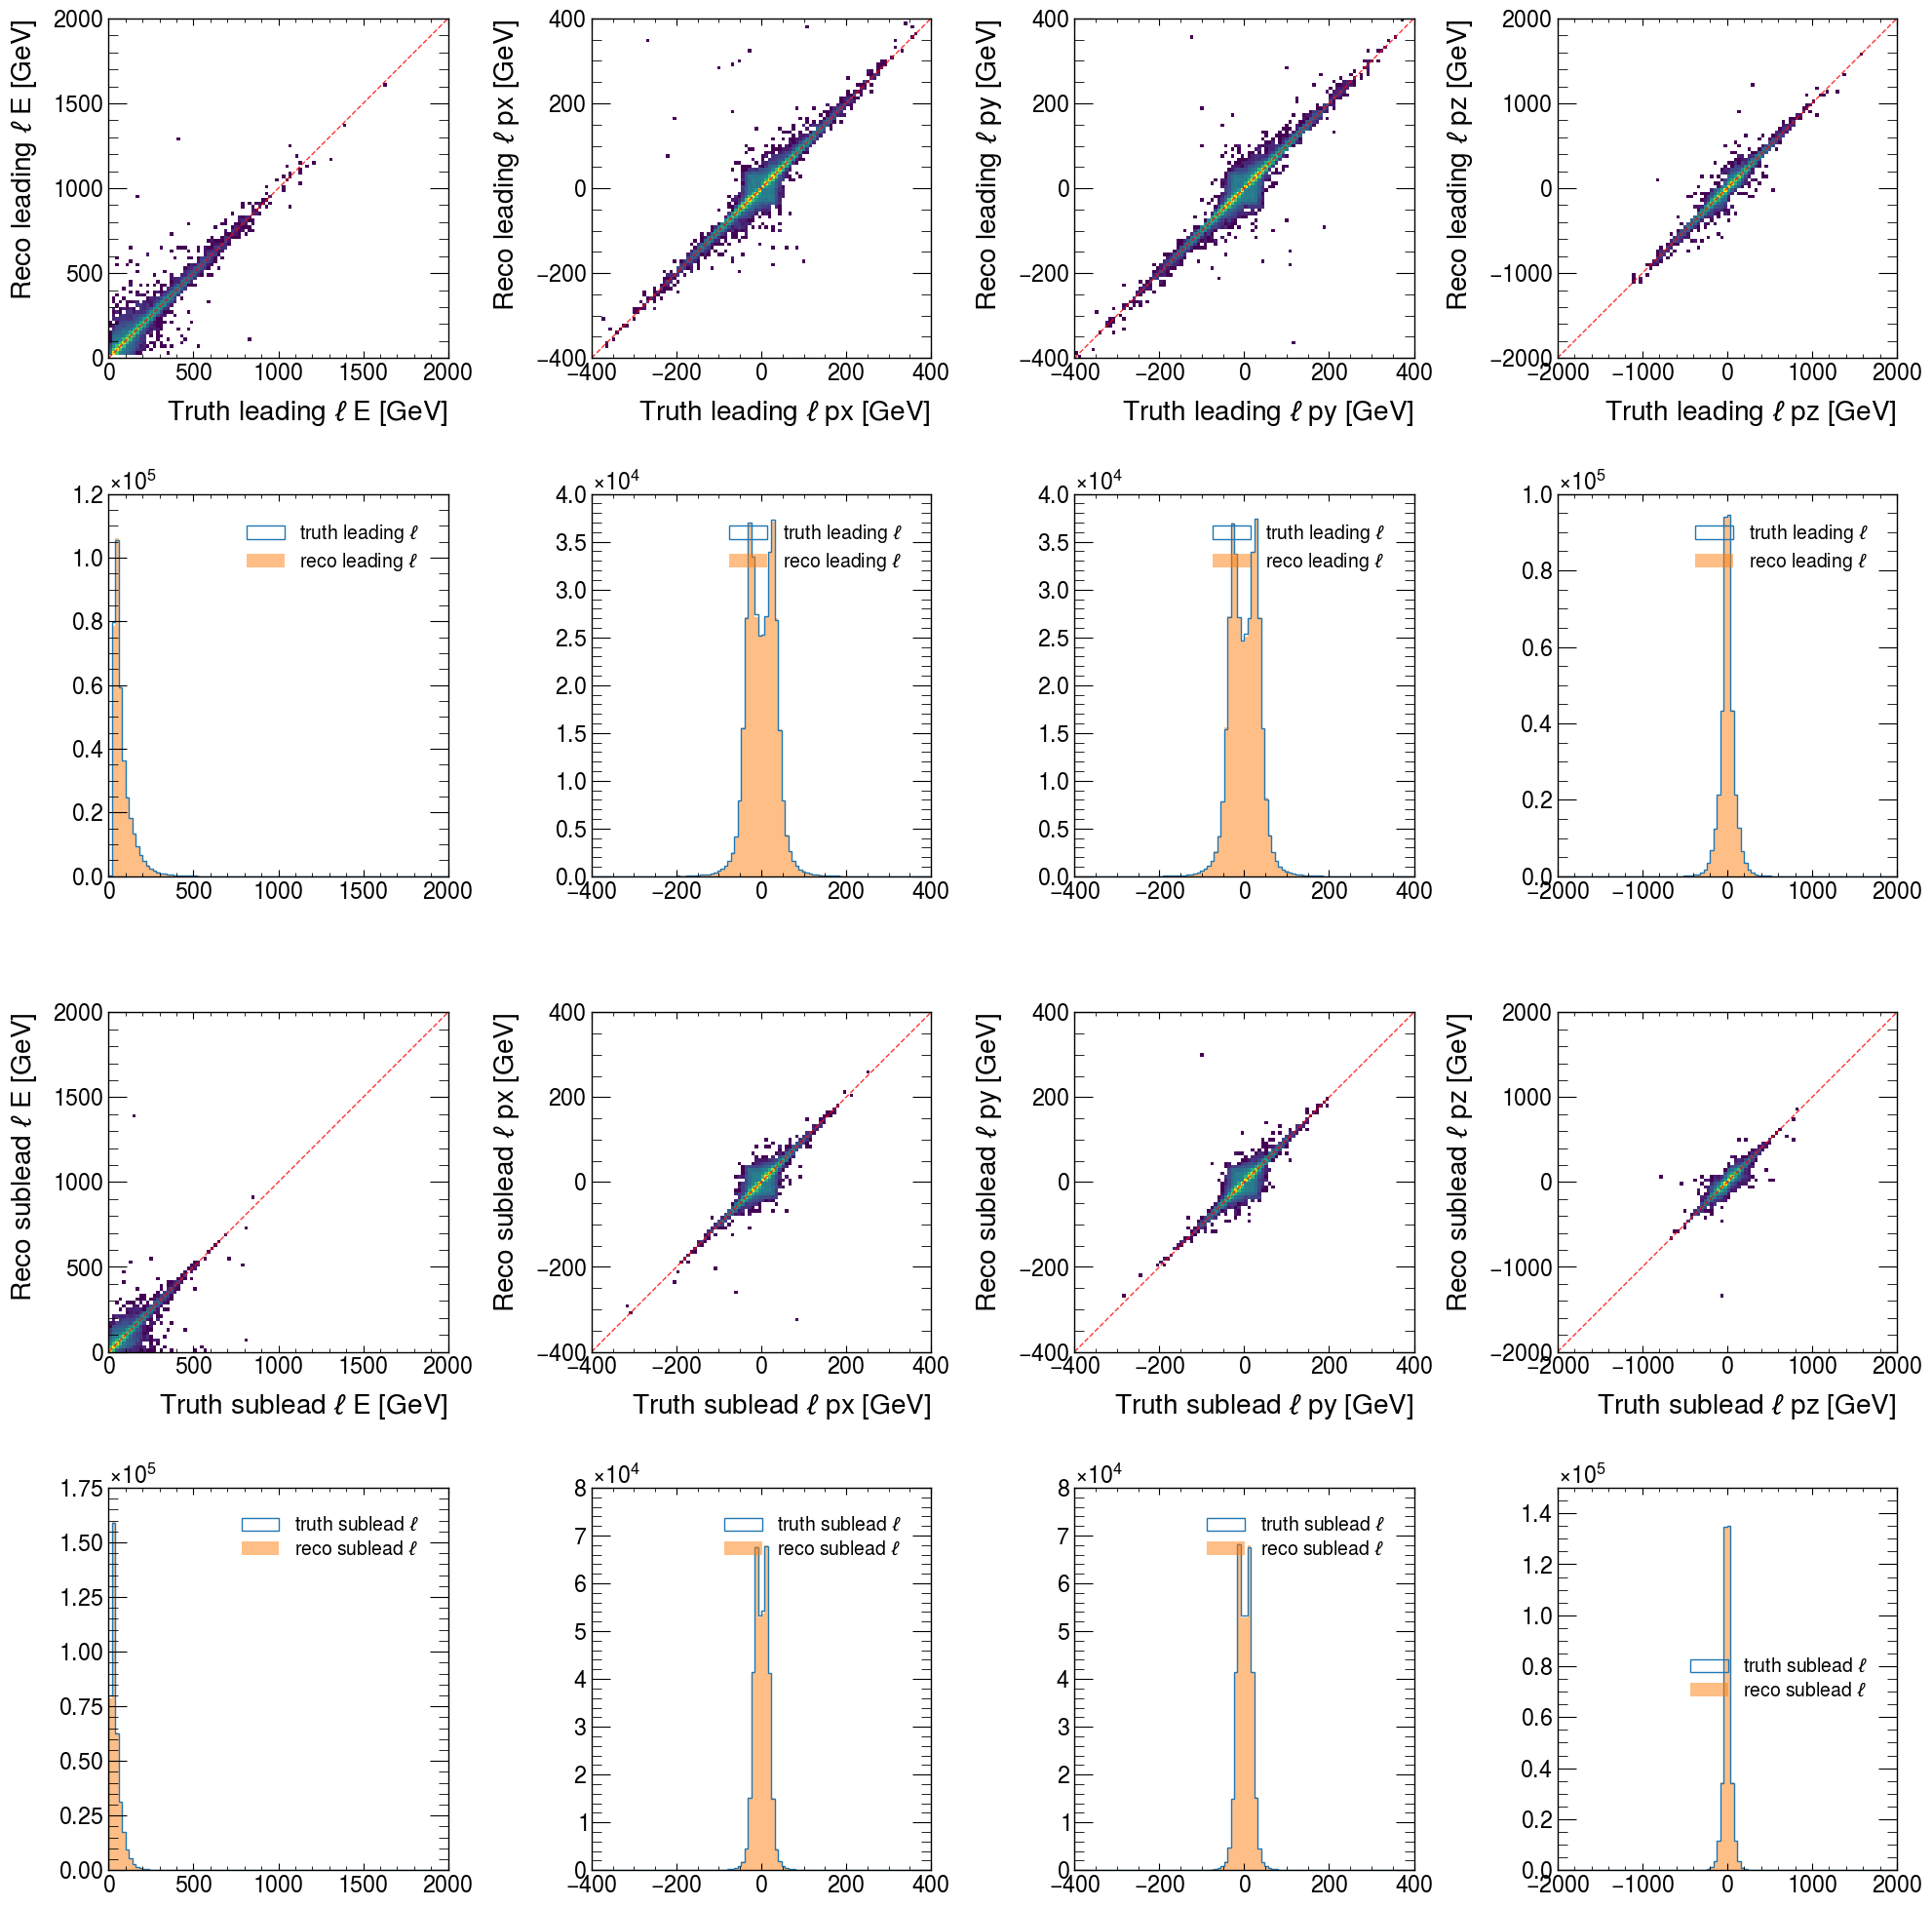

CPU times: user 7.43 s, sys: 441 ms, total: 7.87 s
Wall time: 7.44 s


In [49]:
%%time
fig, ax = plt.subplots(nrows=4,ncols=4,figsize=(20,20),tight_layout=True)
xranges=[[0,2000],[-400,400],[-400,400],[-2000,2000]]

for i,j in enumerate(['E','px','py','pz']):
    ax[0,i].hist2d(truth_leading_lep_cut[j],reco_leading_lep_cut[j],range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap='viridis',norm=mpl.colors.LogNorm())
    ax[2,i].hist2d(truth_sublead_lep_cut[j],reco_sublead_lep_cut[j],range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap='viridis',norm=mpl.colors.LogNorm())
    ax[1,i].hist(truth_leading_lep_cut[j],range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'truth leading $\ell$'      )
    ax[1,i].hist( reco_leading_lep_cut[j],range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'reco leading $\ell$')
    ax[3,i].hist(truth_sublead_lep_cut[j],range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'truth sublead $\ell$')
    ax[3,i].hist( reco_sublead_lep_cut[j],range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'reco sublead $\ell$')
    ax[0,i].axline((-1,-1),(1,1),lw=1,ls='dashed',c='r',alpha=0.8)
    ax[2,i].axline((-1,-1),(1,1),lw=1,ls='dashed',c='r',alpha=0.8)
    ax[0,i].set(xlabel=r'Truth leading $\ell$ '+j+' [GeV]',ylabel=r'Reco leading $\ell$ '+j+' [GeV]',aspect=(1))
    ax[2,i].set(xlabel=r'Truth sublead $\ell$ '+j+' [GeV]',ylabel=r'Reco sublead $\ell$ '+j+' [GeV]',aspect=(1))
    ax[1,i].legend()
    ax[3,i].legend()
plt.show()

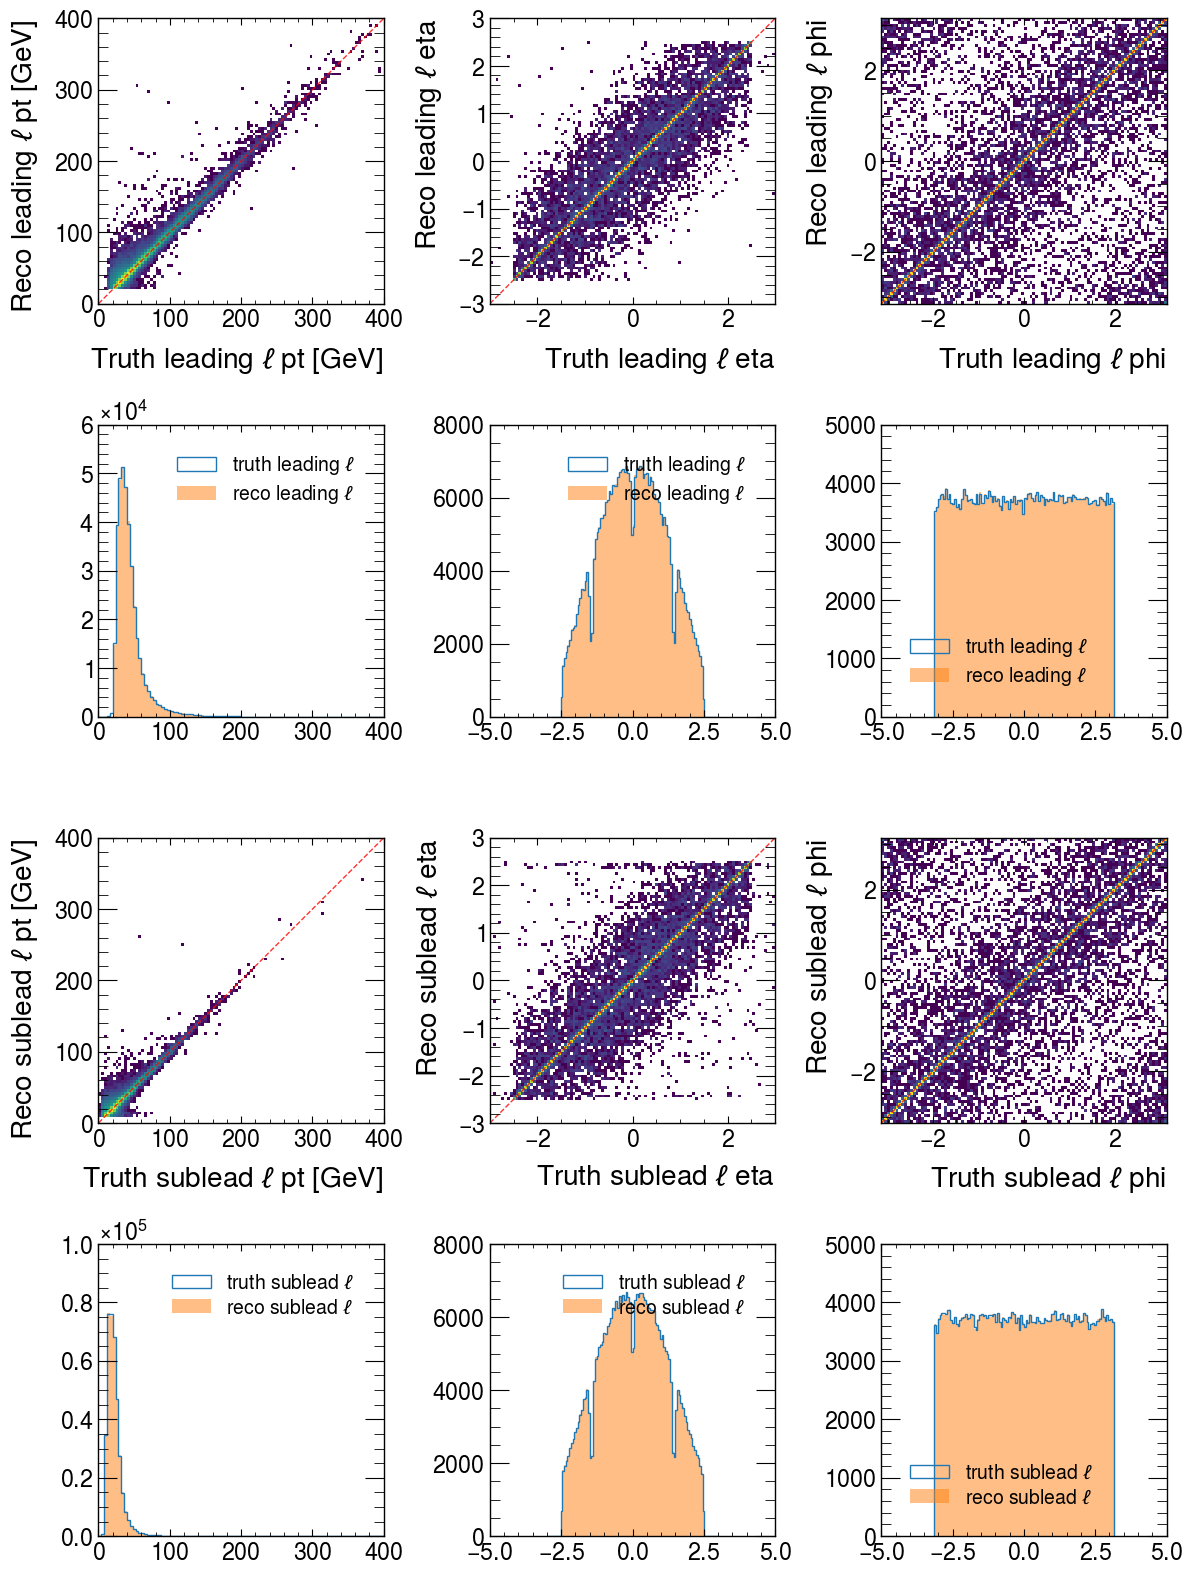

CPU times: user 5.17 s, sys: 457 ms, total: 5.63 s
Wall time: 5.17 s


In [59]:
%%time
fig, ax = plt.subplots(nrows=4,ncols=3,figsize=(12,16),tight_layout=True)
xranges=[[0,400],[-3,3],[-np.pi,np.pi],]
for i,j in enumerate(['pt','eta','phi']):
    GeV = ' [GeV]' if i == 0 else ''
    ax[0,i].hist2d(truth_leading_lep_cut[j],reco_leading_lep_cut[j],range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap=my_cmap,norm=mpl.colors.LogNorm())
    ax[2,i].hist2d(truth_sublead_lep_cut[j],reco_sublead_lep_cut[j],range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap=my_cmap,norm=mpl.colors.LogNorm())
    ax[1,i].hist(truth_leading_lep_cut[j],range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'truth leading $\ell$'      )
    ax[1,i].hist( reco_leading_lep_cut[j],range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'reco leading $\ell$')
    ax[3,i].hist(truth_sublead_lep_cut[j],range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'truth sublead $\ell$')
    ax[3,i].hist( reco_sublead_lep_cut[j],range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'reco sublead $\ell$')
    ax[0,i].axline((-1,-1),(1,1),lw=1,ls='dashed',c='r',alpha=0.8)
    ax[2,i].axline((-1,-1),(1,1),lw=1,ls='dashed',c='r',alpha=0.8)
    ax[0,i].set(xlabel=r'Truth leading $\ell$ '+j+GeV,ylabel=r'Reco leading $\ell$ '+j+GeV,aspect=(1))
    ax[2,i].set(xlabel=r'Truth sublead $\ell$ '+j+GeV,ylabel=r'Reco sublead $\ell$ '+j+GeV,aspect=(1))
    ax[1,i].legend()
    ax[3,i].legend()
plt.show()

# Truth-Reco test: MET

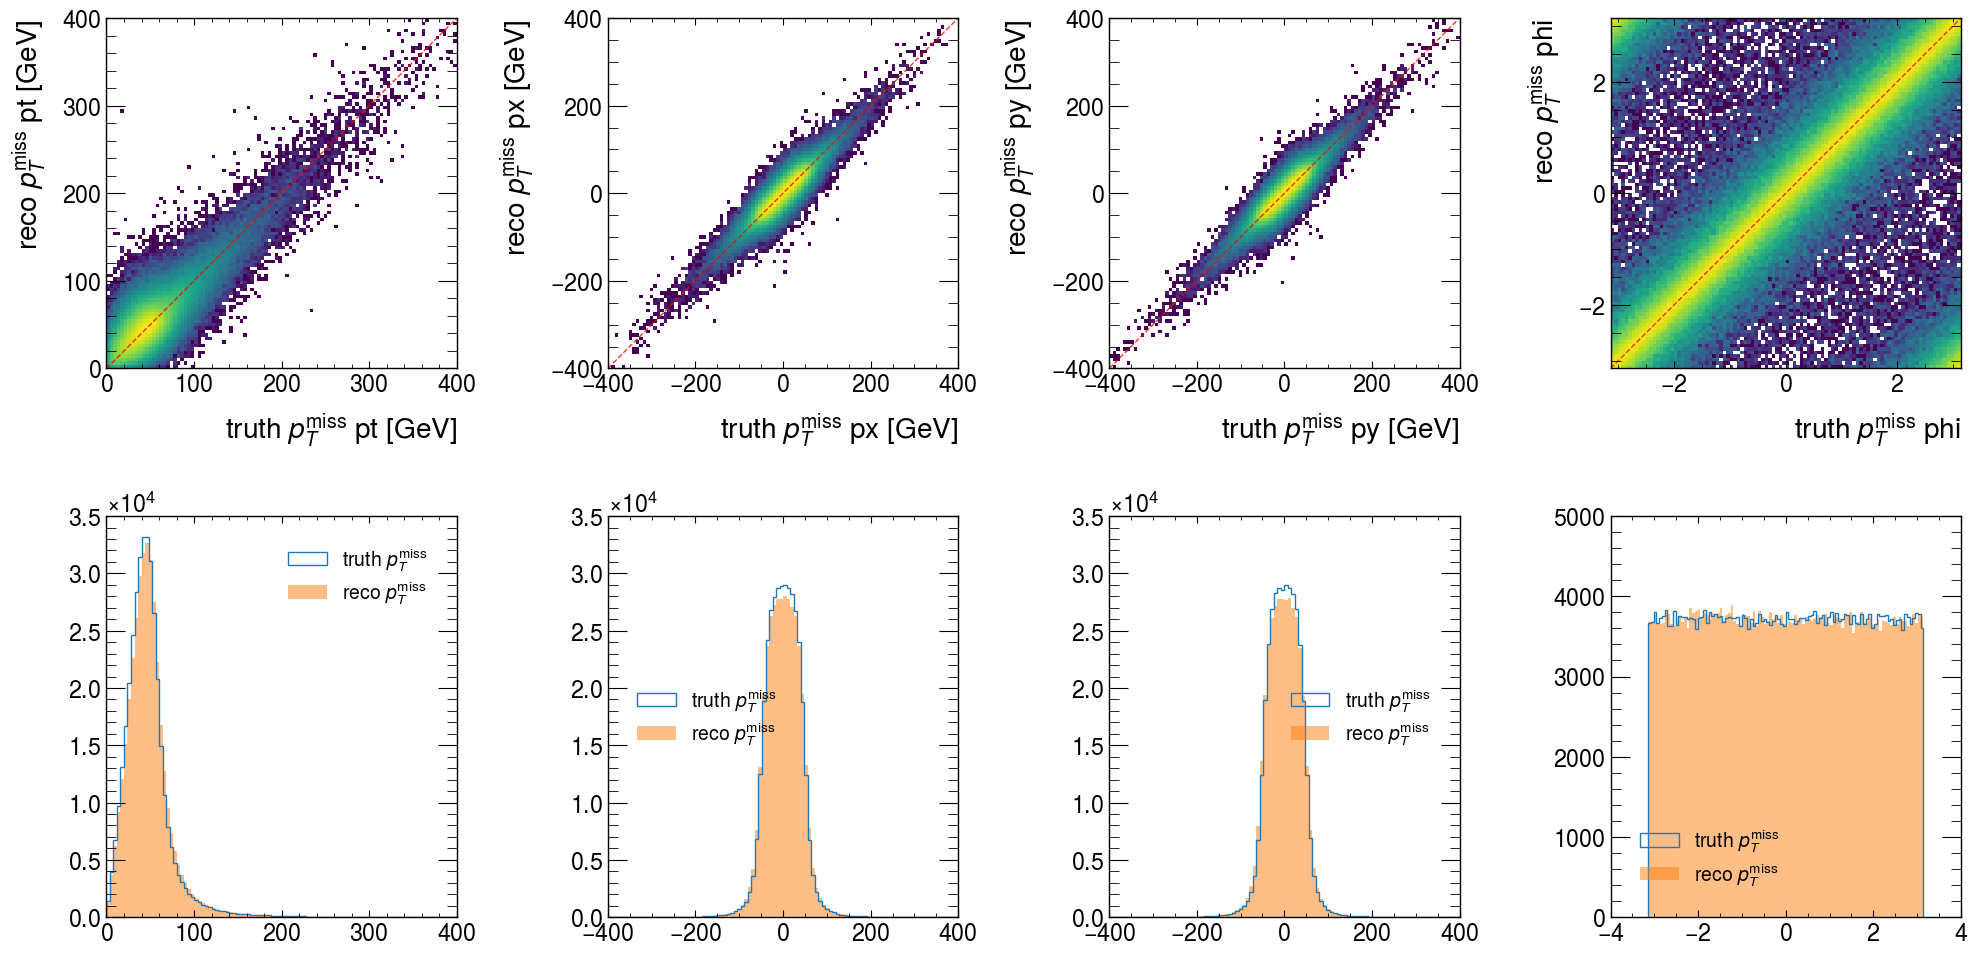

CPU times: user 3.78 s, sys: 426 ms, total: 4.21 s
Wall time: 3.74 s


In [58]:
%%time
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(20,10),tight_layout=True)#,sharey='row')
#ax = ax.flatten()
xranges=[[0,400],[-400,400],[-400,400],[-np.pi,np.pi]]
for i,j in enumerate(['pt','px','py','phi']):
    GeV = ' [GeV]' if i != 3 else ''
    ax[0,i].hist2d(truth_MET_cut[j],reco_MET_cut[j],range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap=my_cmap,norm=mpl.colors.LogNorm())
    ax[1,i].hist( truth_MET_cut[j],range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'truth $p_T^\mathrm{miss}$')
    ax[1,i].hist(reco_MET_cut[j],range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'reco $p_T^\mathrm{miss}$')
    ax[1,i].legend()
    ax[0,i].axline((-1,-1),(1,1),lw=1,ls='dashed',c='r',alpha=0.8)
    ax[0,i].set(xlabel=r'truth $p_T^\mathrm{miss}$ '+j+GeV,ylabel=r'reco $p_T^\mathrm{miss}$ '+j+GeV,aspect=(1))

plt.show()